# Random Forest Feature Clustering and Partial Dependence Plots

# setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from plotnine.data import mpg
from plotnine.data import diamonds

In [3]:
data = diamonds
data = data.sample(500)

# pairsplot

In [4]:
sns.set(style="ticks", color_codes=True)

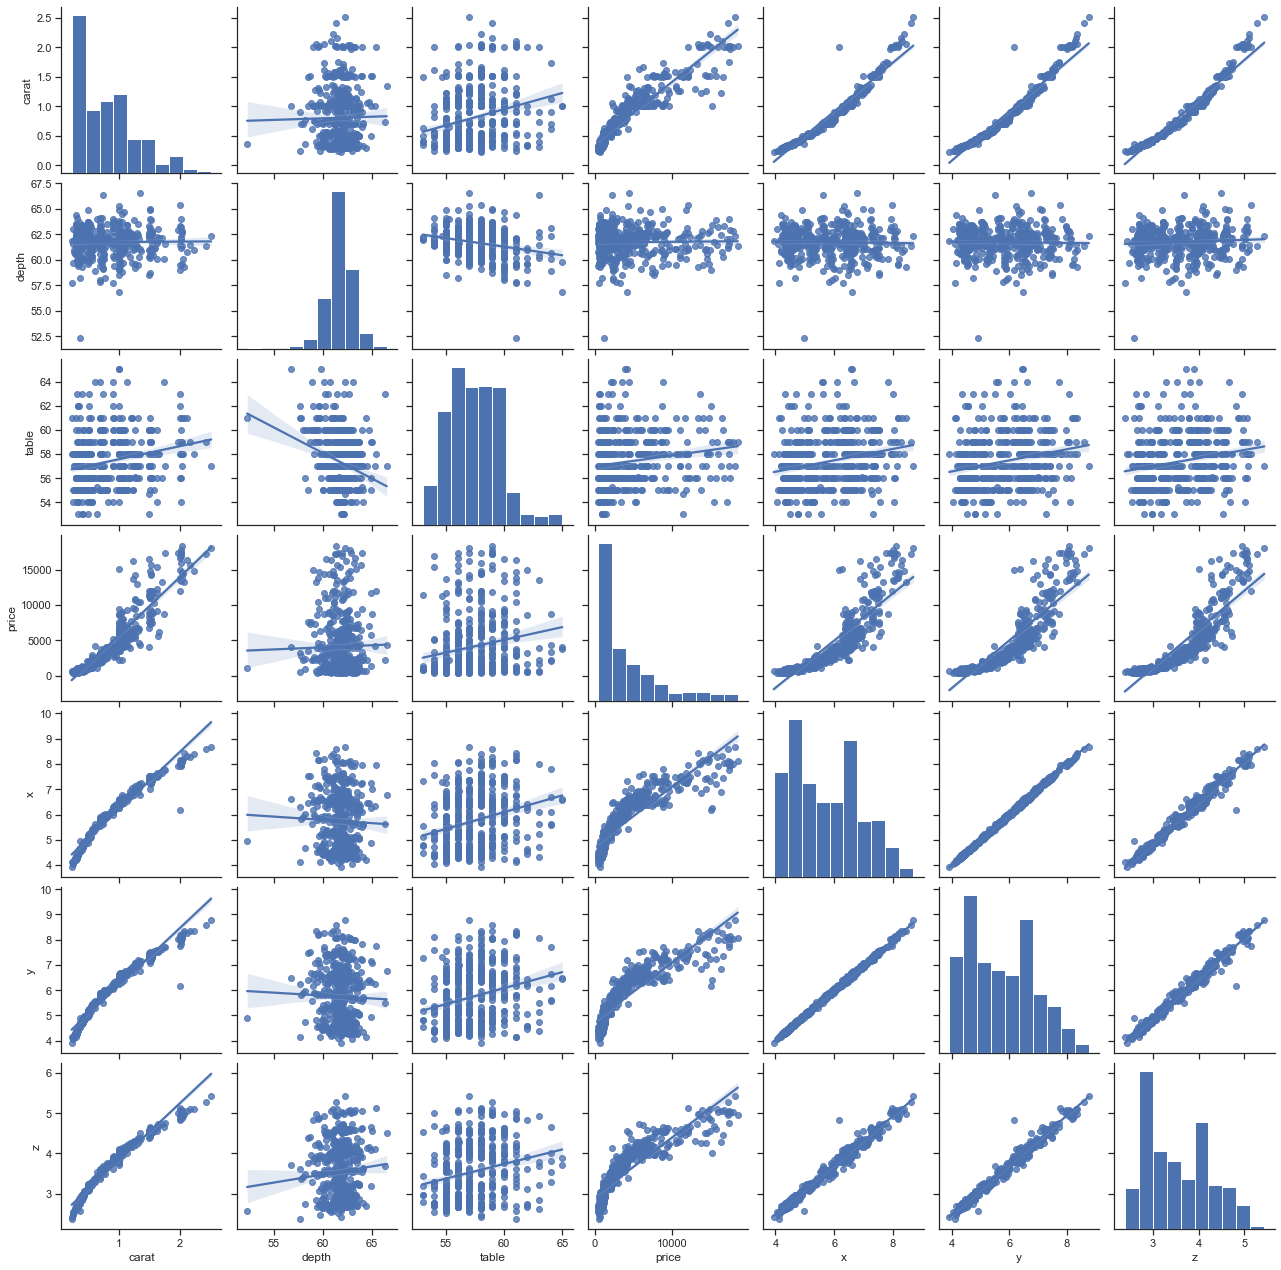

In [5]:
sns.pairplot(data, kind="reg")

# feature clustering

In [6]:
import scipy.stats
from scipy.cluster import hierarchy as hc

In [7]:
corr = np.round(scipy.stats.spearmanr(data.drop(columns=['price'])).correlation, 4)
corr

array([[ 1.000e+00,  8.660e-02,  2.209e-01, -1.802e-01, -5.000e-04,
         2.605e-01,  9.952e-01,  9.952e-01,  9.953e-01],
       [ 8.660e-02,  1.000e+00,  3.750e-02,  3.470e-02, -1.425e-01,
         3.103e-01,  9.260e-02,  9.420e-02,  6.670e-02],
       [ 2.209e-01,  3.750e-02,  1.000e+00,  1.660e-02, -2.400e-03,
         1.197e-01,  2.199e-01,  2.201e-01,  2.164e-01],
       [-1.802e-01,  3.470e-02,  1.660e-02,  1.000e+00,  4.350e-02,
        -7.470e-02, -1.820e-01, -1.789e-01, -1.733e-01],
       [-5.000e-04, -1.425e-01, -2.400e-03,  4.350e-02,  1.000e+00,
        -1.983e-01, -5.050e-02, -4.730e-02,  7.110e-02],
       [ 2.605e-01,  3.103e-01,  1.197e-01, -7.470e-02, -1.983e-01,
         1.000e+00,  2.619e-01,  2.541e-01,  2.271e-01],
       [ 9.952e-01,  9.260e-02,  2.199e-01, -1.820e-01, -5.050e-02,
         2.619e-01,  1.000e+00,  9.982e-01,  9.872e-01],
       [ 9.952e-01,  9.420e-02,  2.201e-01, -1.789e-01, -4.730e-02,
         2.541e-01,  9.982e-01,  1.000e+00,  9.877e-01],


In [8]:
corr_condensed = hc.distance.squareform(1-corr)
corr_condensed

array([0.9134, 0.7791, 1.1802, 1.0005, 0.7395, 0.0048, 0.0048, 0.0047,
       0.9625, 0.9653, 1.1425, 0.6897, 0.9074, 0.9058, 0.9333, 0.9834,
       1.0024, 0.8803, 0.7801, 0.7799, 0.7836, 0.9565, 1.0747, 1.182 ,
       1.1789, 1.1733, 1.1983, 1.0505, 1.0473, 0.9289, 0.7381, 0.7459,
       0.7729, 0.0018, 0.0128, 0.0123])

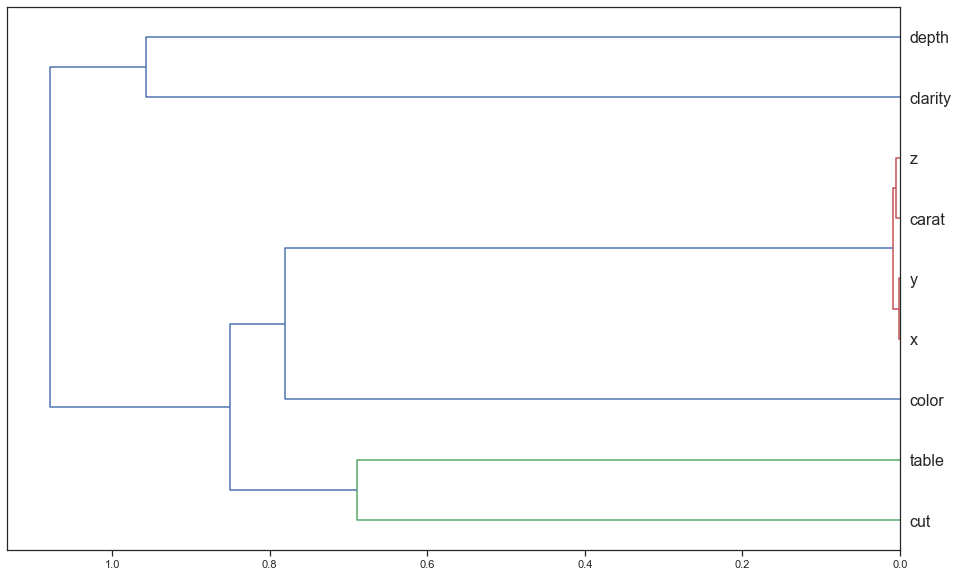

In [9]:
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=data.drop(columns=['price']).columns, orientation='left', leaf_font_size=16)
plt.show()

# ggplot (plotnine)

In [10]:
from plotnine import ggplot, aes, geom_point, labs, stat_smooth

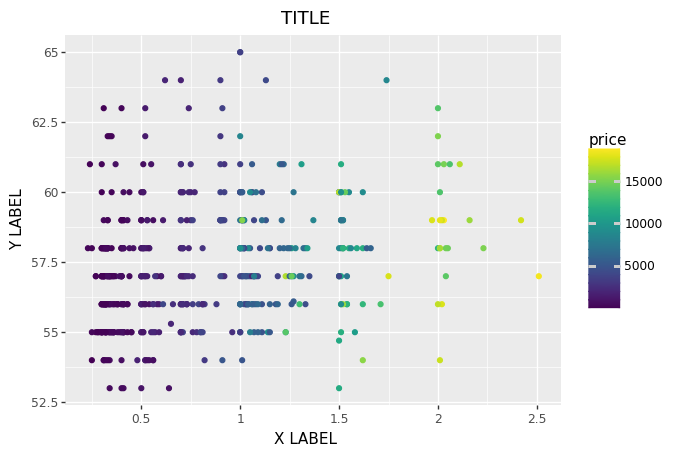

<ggplot: (7010736257)>

In [11]:
(ggplot(data)
 + aes(x='carat', y='table', color='price')
 + geom_point()
 + labs(title='TITLE', x='X LABEL', y='Y LABEL'))

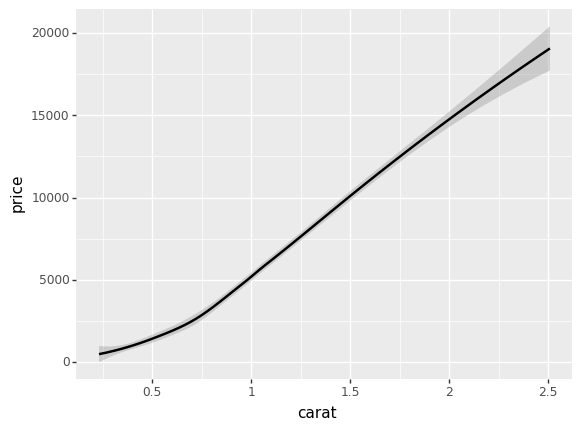

<ggplot: (7011195861)>

In [12]:
ggplot(data, aes('carat', 'price'))+stat_smooth(se=True, method='loess')

# random forest

In [13]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split

In [14]:
X = data.drop(columns=['price'])
X = pd.get_dummies(X,columns=['cut','color','clarity'])
y = data.price

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
clf = RandomForestRegressor(n_estimators=40, 
                            min_samples_leaf=3, 
                            max_features=0.5, 
                            n_jobs=-1, 
                            oob_score=True)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# metrics 

In [18]:
clf.score(X_train, y_train)

0.9599118826556967

In [19]:
clf.score(X_test, y_test)

0.9224211154737094

# partial dependence plots

In [20]:
from pdpbox import pdp

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1fd155d0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1fd63650>})

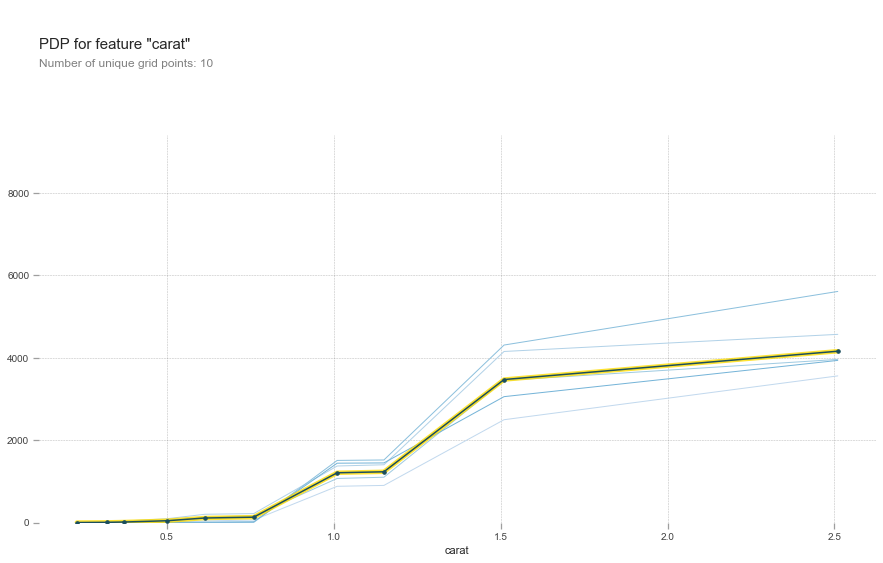

In [21]:
feature = 'carat'
p = pdp.pdp_isolate(clf, X_train, X_train.columns, feature)
pdp.pdp_plot(p, feature, plot_lines=True, cluster=True, n_cluster_centers=5)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a1fdf8dd0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a205d8110>})

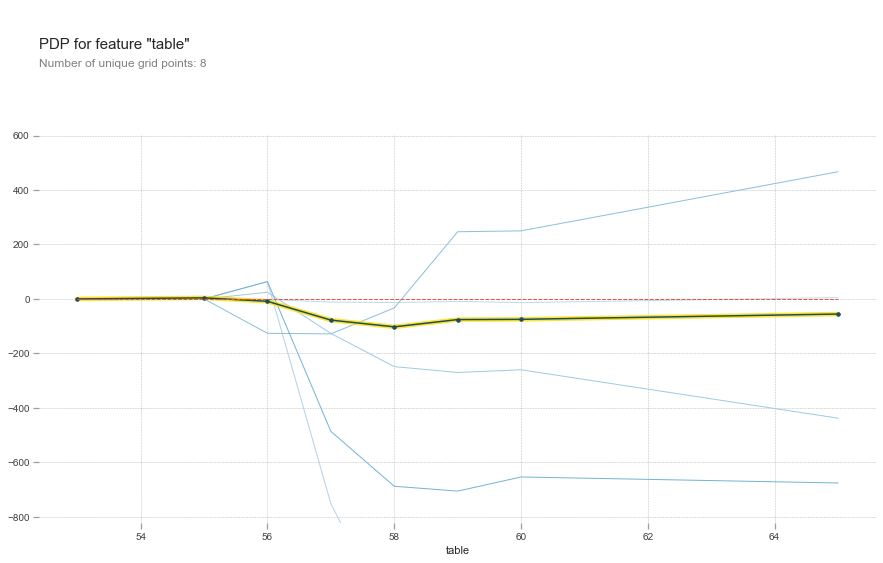

In [22]:
feature = 'table'
p = pdp.pdp_isolate(clf, X_train, X_train.columns, feature)
pdp.pdp_plot(p, feature, plot_lines=True, cluster=True, n_cluster_centers=5)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a22212790>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a2426a810>})

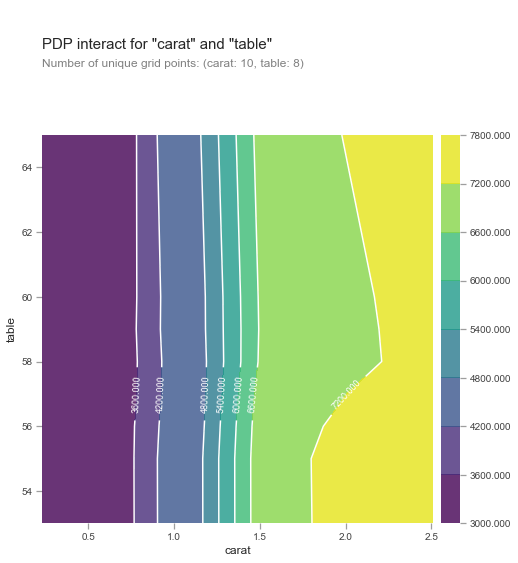

In [25]:
features = ['carat','table']
# go to ~/anaconda3/envs/ENV_NAME/lib/python3.6/site-packages/pdpbox/pdp_plot_utils.py
# change “contour_label_fontsize=fontsize” to “fontsize=fontsize”
p = pdp.pdp_interact(clf, X_train, X_train.columns, features)
pdp.pdp_interact_plot(p, features, )